# Machine Learning on ADNICOMB_lt
##### Xiao Gao, Department of Radiology and Biomedical Imaging, UCSF; Myriam Chaumeil Lab (xiao.gao@ucsf.edu; xiao.gao@berkeley.edu)  


### Purpose: Trying several machine learning algorithms on dataset `ADNICOMB_lt`

### Prerequisite: `ADNICOMB_lt` Pandas DataFrame

### Notice: This document is presented by the author(s) as a service to ADNI data users. However, users should be aware that no formal review process has vetted this document and that ADNI cannot guarantee the accuracy or utility of this document.

## 0. Loading Libraries

In [32]:
import os 
import numpy as np 
import pandas as pd
import pymc3 as pm
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
working_dir = os.path.dirname(os.getcwd()) # working from the upper directory of this .ipynd file
for root, dirs, files in os.walk(working_dir):
    for name in files:
        if name=='adnicomb_v1_5.pkl':
            adnicomb_dir = root + os.sep + name
        if name=='adnicomb_lt.pkl':
            adnicomb_lt_dir = root + os.sep + name
            
adnicomb = pd.read_pickle(adnicomb_dir)
adnicomb_lt = pd.read_pickle(adnicomb_lt_dir)

In [27]:
adnicomb.columns

Index(['merge_RID', 'merge_PTID', 'merge_VISCODE', 'merge_SITE',
       'merge_COLPROT', 'merge_ORIGPROT', 'merge_EXAMDATE', 'merge_DX_bl',
       'merge_AGE', 'merge_PTGENDER',
       ...
       'msms2_VISCODE', 'msms2_VISCODE2', 'msms2_EXAMDATE', 'msms2_VID',
       'msms2_RUNDATE', 'msms2_ABETA42', 'msms2_ABETA40', 'msms2_ABETA38',
       'msms2_update_stamp', 'msms2_numdate'],
      dtype='object', length=5413)

In [28]:
adnicomb_lt.columns

Index(['rid', 'col_prot', 'orig_prot', 'exam_date', 'mon_bl', 'age', 'dx',
       'dx_bl_fine', 'dx_bl', 'dx_end', 'dx_conv', 'gender', 'edu', 'apoe4',
       'abeta', 'tau', 'ptau', 'cdrsb', 'adas11', 'adas13', 'adasq4', 'mmse',
       'ravlt_immed', 'ravlt_learn', 'ravlt_forget', 'ravlt_perc_forget',
       'ldel', 'digit_score', 'trailb', 'faq', 'moca', 'ecog_pt_mem',
       'ecog_pt_lang', 'ecog_pt_visspat', 'ecog_pt_plan', 'ecog_pt_organ',
       'ecog_pt_divatt', 'ecog_pt_total', 'ecog_sp_mem', 'ecog_sp_lang',
       'ecog_sp_visspat', 'ecog_sp_plan', 'ecog_sp_organ', 'ecog_sp_divatt',
       'ecog_sp_total', 'mr_fs', 'mr_3t', 'fs_version', 'fs_icv', 'fs_cv',
       'fs_atr', 'tau_pet', 'tau_subcort_wm', 'tau_suvr', 'av45_pet',
       'av45_suvr', 'av45_subcort_wm', 'fbb_pet', 'fbb_suvr', 'fbb_subcort_wm',
       'asl', 'asl_min', 'asl_max', 'asl_md', 'asl_avg', 'asl_sd', 'asl_ct',
       'msms', 'msms_version', 'msms_abeta42', 'msms_abeta40', 'msms_abeta38',
       'nfl_version'

In [4]:
adnicomb.head()

rid col_prot orig_prot                                          exam_date  \
0    2    ADNI1     ADNI1  [2005-09-08, 2006-03-06, 2008-08-27, 2010-09-2...   
1    3    ADNI1     ADNI1  [2005-09-12, 2006-03-13, 2006-09-12, 2007-03-1...   
2    4    ADNI1     ADNI1  [2005-11-08, 2006-05-02, 2006-11-14, 2007-05-1...   
3    5    ADNI1     ADNI1  [2005-09-07, 2006-03-09, 2006-09-05, 2007-03-0...   
4    6    ADNI1     ADNI1  [2005-11-29, 2006-06-01, 2006-11-20, 2007-05-1...   

                                              mon_bl  \
0  [0, 6, 36, 60, 66, 72, 78, 84, 90, 96, 102, 10...   
1                                 [0, 6, 12, 18, 24]   
2                             [0, 6, 12, 18, 30, 36]   
3                         [0, 6, 12, 18, 24, 30, 36]   
4                         [0, 6, 12, 18, 24, 30, 36]   

                                                 age  \
0  [74.3, 74.8, 77.3, 79.3, 79.8, 80.3, 80.8, 81....   
1                     [81.3, 81.8, 82.3, 82.8, 83.3]   
2               [67.5, 68.0, 68.5, 69.0, 70.0, 70.5]   
3         [73.7, 74.2, 74.7, 75.2, 75.7, 76.4, 76.7]   
4         [80.4, 80.9, 81.4, 81.9, 82.3, 82.9, 83.4]   

                                                  dx dx_bl_fine dx_bl dx_end  \
0  [1, 1, 1, 1, nan, 1, nan, 2, nan, 1, nan, nan,...          1     1      2   
1                                  [3, 3, 3, nan, 3]          3     3      3   
2                               [2, 2, 2, 2, nan, 2]        2.5     2      2   
3                          [1, 1, 1, nan, 1, nan, 1]          1     1      1   
4                            [2, 2, 2, 2, 2, nan, 2]        2.5     2      2   

   ...                                            asl_avg  \
0  ...  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  ...  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
2  ...  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
3  ...  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
4  ...  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                              asl_sd  \
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
2  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
4  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                              asl_ct  \
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
2  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
4  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                                msms  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1                          [1.0, 0.0, 0.0, 0.0, 0.0]   
2                     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3                [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
4                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                        msms_version  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1                          [1.0, nan, nan, nan, nan]   
2                     [1.0, nan, nan, nan, nan, nan]   
3                [1.0, nan, nan, nan, nan, nan, nan]   
4                [nan, nan, nan, nan, nan, nan, nan]   

                                        msms_abeta42  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1                        [987.0, nan, nan, nan, nan]   
2                  [1246.0, nan, nan, nan, nan, nan]   
3              [678.0, nan, nan, nan, nan, nan, nan]   
4                [nan, nan, nan, nan, nan, nan, nan]   

                                        msms_abeta40  \
0  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1                       [6990.0, nan, nan, nan, nan]   
2                  [8090.0, nan, nan, nan, nan, nan]   
3             [6553.0, nan, nan, nan, nan, nan, nan]   
4                [nan, nan, nan, na

Text(0.5, 1.0, 'Density Plot of End-of-Study Diagnosis by Location')

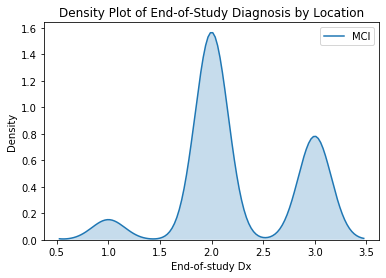

In [30]:

%matplotlib inline
# Make one plot for each different location
# sns.kdeplot(adnicomb.loc[adnicomb['dx_bl'] == 1, 'dx_end'].dropna().astype(int), 
#             label = 'NC', shade = True)
sns.kdeplot(adnicomb_lt.loc[adnicomb_lt['dx_bl'] == 2, 'dx_end'].dropna().astype(int), 
            label = 'MCI', shade = True)
# sns.kdeplot(adnicomb.loc[adnicomb['dx_bl'] == 3, 'dx_end'].dropna().astype(int), 
#             label = 'AD', shade = True)

# Add labeling
plt.xlabel('End-of-study Dx')
plt.ylabel('Density')
plt.title('Density Plot of End-of-Study Diagnosis by Location')